# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

## Setup

### Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import requests
import os

%matplotlib inline

In [2]:
plt.style.use("ggplot")
print("matplotlib version: ", mpl.__version__)

matplotlib version:  3.10.5


### Importing Dataset

In [3]:
dir_path = os.path.join(".", "data")
os.makedirs(dir_path, exist_ok=True)

def download_file(url: str) -> str:
    with requests.get(url=url, stream=True) as response:
        response.raise_for_status()

        filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])
        total_size = int(response.headers.get("Content-Length", 0))
        chunk_size = 1024 ** 2
        download_size = 0

        with open(filepath, "wb") as file:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if not chunk:
                    continue

                file.write(chunk)
                download_size += len(chunk)

                if total_size > 0:
                    progress = (download_size / total_size) * 100
                    print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")

    print("Download Complete.")
    return filepath

In [4]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
filename = download_file(data_url)

Downloading: 100.00% (34893 / 34893 bytes)
Download Complete.


In [5]:
df = pd.read_csv(filename)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


<p>Let's find out how many entries there are in our dataset.</p>

In [6]:
df.shape

(195, 39)

## Visualizing Data using `matplotlib`

<p>For plotting the data easily, let's first set the country name as index - useful for quickly looking up countries using <code>loc()</code> method.</p>

In [7]:
df = df.set_index("Country")
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


<p>Notice now the country names serve as indices.</p>
<p>Finally, let's create a list of years from 1980-2013, this will come in handy when we start plotting the data.</p>

In [8]:
def year_list(a: int, b: int) -> list[str]:
    return list(map(str, range(a, b)))

years = year_list(1980, 2014)

### Pie Charts

<p>A <code>pie</code> chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in <code>matplotlib</code> by passing in the <code>kind=pie</code> keyword.</p>
<p>Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.</p>

<p><b>Step 1 - Gather data</b></p>
<p>We will use <code>dataframe.groupby()</code> method to summarize the immigration data by <code>Continent</code>. The general process of <code>groupby</code> involves the following steps:</p>
<ol>
    <li><b>Split:</b> Splitting the data into groups based on some criteria.</li>
    <li><b>Apply:</b> Applying a function to each group independently: <code>sum()</code>, <code>count()</code>, <code>mean()</code>, <code>std()</code>, <code>aggregate()</code>, <code>apply()</code>, etc.</li>
    <li><b>Combine:</b> Combining the results into a data structure.</li>
</ol>

<img src="data/Mod3Fig4SplitApplyCombine.png" height="400" align="center">

In [9]:
df_con = df.groupby("Continent").sum()
df_con.head()

,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


In [10]:
type(df.groupby("Continent"))

pandas.core.groupby.generic.DataFrameGroupBy

<p><b>Step 2 - Plot the data</b></p>
<p>We will pass in <code>kind="pie"</code> keyword, along with the following additional parameters:</p>
<ul>
    <li><code>autopct</code>: is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be <code>fmt%pct</code>.</li>
    <li><code>startangle</code>: Rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.</li>
    <li><code>shadow</code>: Draws a shadow beneath the pie (to give a 3D feel).</li>
</ul>

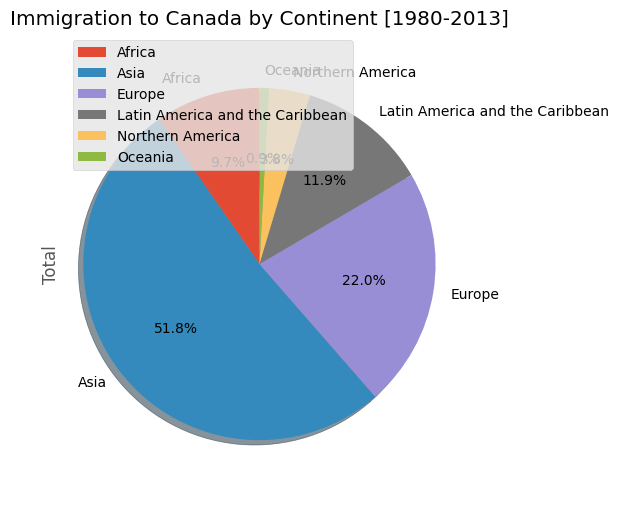

In [11]:
df_con["Total"].plot(kind="pie", figsize=(5, 6), autopct="%1.1f%%", startangle=90, shadow=True)

plt.title("Immigration to Canada by Continent [1980-2013]")
plt.axis("equal")
plt.legend(labels=df_con.index, loc="upper left")

<p>The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:</p>
<ul>
    <li>Remove the text labels on the pie chart by passing in <code>legend</code> and add it as a seperate legend using <code>plt.legend()</code>.</li>
    <li>Push out the percentages to sit just outside the pie chart by passing in <code>pctdistance</code> parameter.</li>
    <li>Pass in a custom set of colors for continents by passing in <code>colors</code> parameter.</li>
    <li>Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in <code>explode</code> parameter.</li>
</ul>

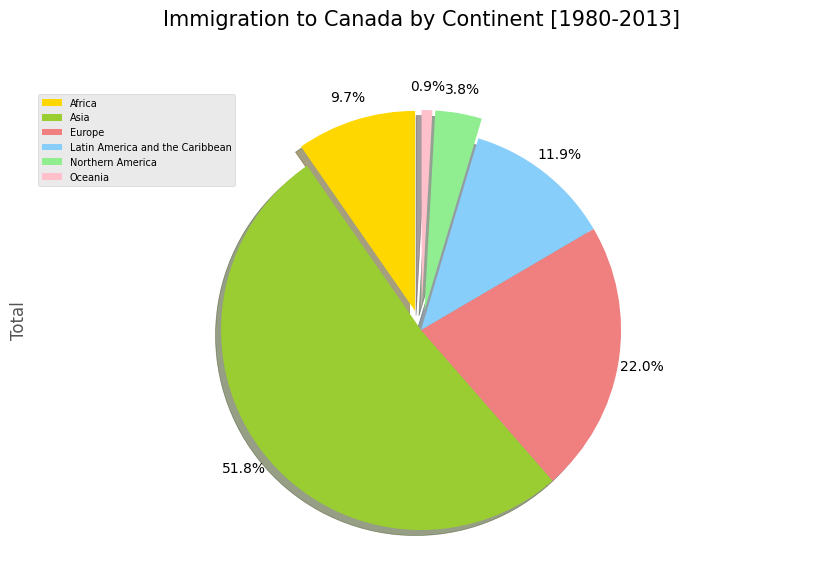

In [12]:
color_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "lightgreen", "pink"]
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_con["Total"].plot(kind="pie", figsize=(10, 6), autopct="%1.1f%%", startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=color_list, explode=explode_list)

plt.title("Immigration to Canada by Continent [1980-2013]", y=1.12, fontsize=15)
plt.axis("equal")
plt.legend(labels=df_con.index, loc="upper left", fontsize=7)

<p><b>Question:</b> Using a pie chart, explore the proportion (percentage) of nnew immigrants grouped by continents in the year 2013.</p>
<p><b>Note:</b> You might need to play with the explore values in order to fix any overlapping slice values.</p>

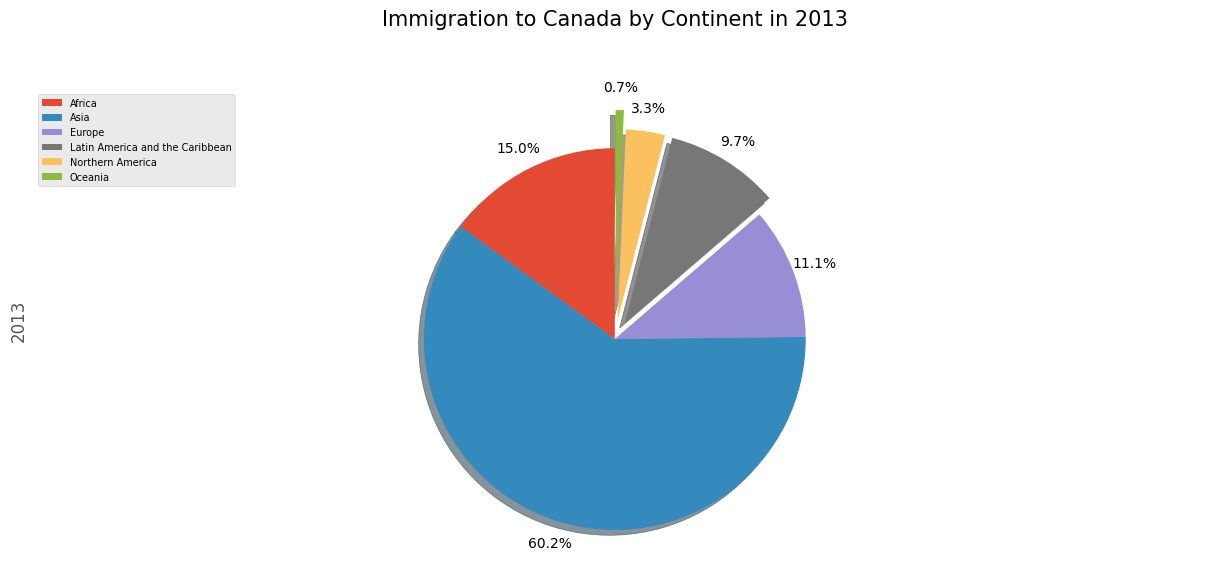

In [13]:
explode_list = [0, 0, 0, 0.1, 0.1, 0.2]

df_con["2013"].plot(kind="pie", figsize=(15, 6), autopct="%1.1f%%", startangle=90, shadow=True, labels=None, pctdistance=1.12, explode=explode_list)

plt.title("Immigration to Canada by Continent in 2013", y=1.12, fontsize=15)
plt.axis("equal")
plt.legend(labels=df_con.index, loc="upper left", fontsize=7)

### Box Plots

<p>A <code>box</code> plot is a way of statistically representing the <b>distribution</b> of the data through five main dimensions:</p>
<ul>
    <li><b>Minimum:</b> The smallest number in the dataset excluding the outliers.</li>
    <li><b>First quartile:</b> Middle number between the <code>minimum</code> and the <code>median</code>.</li>
    <li><b>Second quartile (Median):</b> Middle number of the (sorted) dataset.</li>
    <li><b>Third quartile:</b> Middle number between <code>median</code> and <code>maximum</code>.</li>
    <li><b>Maximum:</b> The largest number in the dataset excluding the outliers.</li>
</ul>

<img src="data/boxplot_complete.png" width="440" align="center">

<p>To make a <code>boxplot</code>, we can use <code>kind=box</code> in <code>plot</code> method invoked on a <code>pandas.Series</code> or <code>pandas.DataFrame</code>.</p>
<p>Let's plot the box plot for the Japanese immigrants between 1980 and 2013.</p>

<p><b>Step 1: Get the subset of the dataset</b></p>
<p>Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the <code>dataframe.describe()</code> method to view the percentiles.</p>

In [14]:
df_jp = df.loc[["Japan"], years].transpose()
df_jp.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


<p><b>Step 2: Plot by passing in <code>kind="box"</code></b></p>

Text(0, 0.5, 'Number of Immigrants')

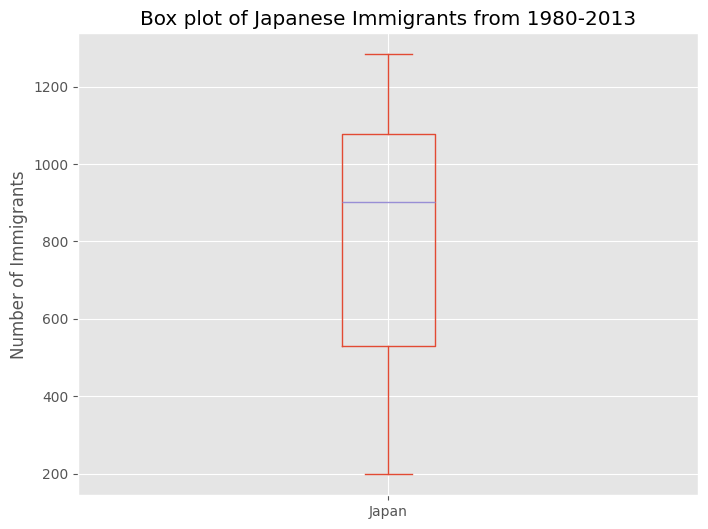

In [15]:
df_jp.plot(kind="box", figsize=(8, 6))
plt.title("Box plot of Japanese Immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")

<p>We can immediately make a few key observations from the plot above:</p>
<ol>
    <li>The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).</li>
    <li>25% of the years for period 1980-2013 had an annual immigrant count of ~500 or fewer (First quartile).</li>
    <li>75% of the years for period 1980-2013 had an annual immigrant count of ~1100 or fewer (Third quartile).</li>
</ol>
<p>We can view the actual numbers by calling the <code>describe()</code> method on the dataframe.</p>

In [16]:
df_jp.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


<p>One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyze these two countries further using box plots.</p>
<p><b>Question:</b> Compare the distribution of the number of new immigrants from China and India for the period 1980-2013.</p>

<p><b>Step 1:</b> Get the dataset for China and India and call the dataframe <code>df_cn_in</code>.</p>

In [17]:
df_cn_in = df.loc[["China", "India"], years].transpose()
df_cn_in.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


<p>Let's view the percentiles associated with both countries using the <code>describe()</code> method.</p>

In [18]:
df_cn_in.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


<p><b>Step 2:</b> Plot data.</p>

Text(0, 0.5, 'Number of Immigrants')

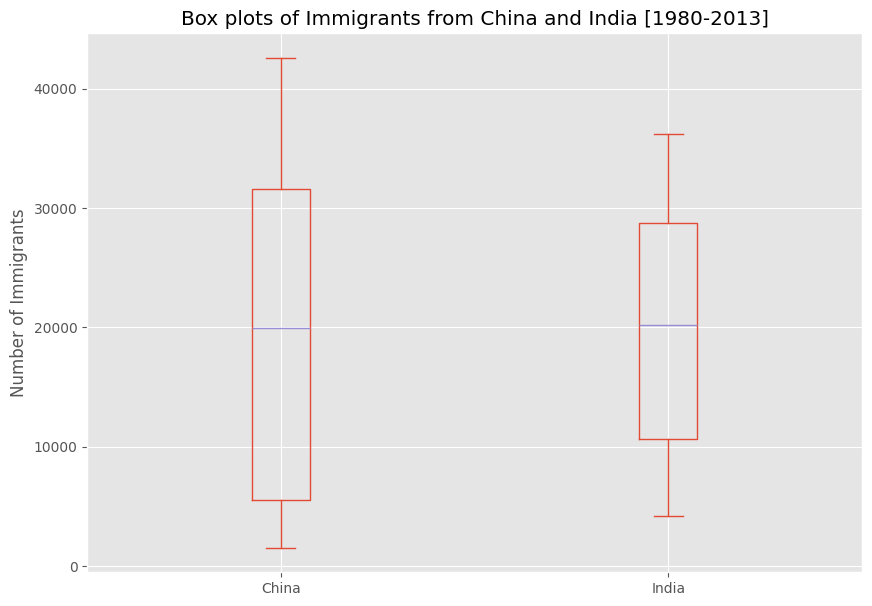

In [19]:
df_cn_in.plot(kind="box", figsize=(10, 7))

plt.title("Box plots of Immigrants from China and India [1980-2013]")
plt.ylabel("Number of Immigrants")

<p>We can observe that, while both countries have around the same median immigrant population (~20,000), China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).</p>

<p>If you prefer to create horizontal box plots, you can pass the <code>vert</code> parameter in the <code>plot()</code> function and assign it to <code>False</code>. You can also specify a different color in case you are not a big fan of the default red color.</p>

Text(0, 0.5, 'Number of Immigrants')

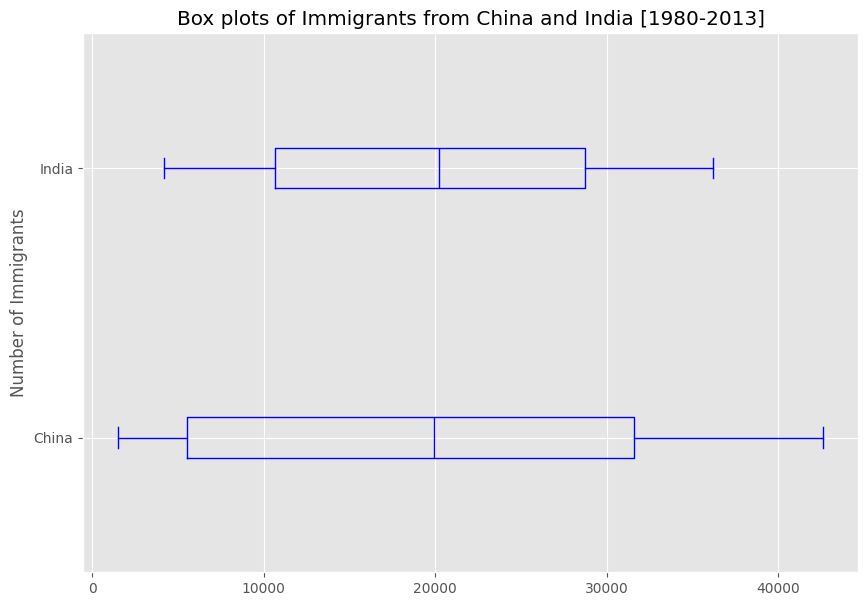

In [20]:
df_cn_in.plot(kind="box", figsize=(10, 7), color="blue", vert=False)

plt.title("Box plots of Immigrants from China and India [1980-2013]")
plt.ylabel("Number of Immigrants")

### Subplots

<p>Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.</p>
<p>To visualize multiple plots together, we can create a <code>figure<code> (overall canvas) and divide it into <code>subplots</code>, each containing a plot. With <code>subplots</code>, we usually work with the <b>artist layey</b> instead of the <b>scripting layer</b>.</p>
<p>Typical syntax is:</p>
<pre>fig = plt.figure()    # create figure<br />ax = fig.add_subplot(nrows, ncols, plot_number)    # create subplots</pre>
<p>Where:</p>
<ul>
    <li><code>nrows</code> and <code>ncols</code> are used to notionally split the figure into <code>nrows</code> × <code>ncols</code> sub-axes.</li>
    <li><code>plot_number</code> is used to identify the particular subplot that this function is to create within the notional grid. <code>plot_number</code> starts at 1, increments across rows first and has a maximum of <code>nrows</code> × <code>ncols</code> as shown below.</li>
</ul>

<img src="data/Mod3Fig5Subplots_V2.png" width="500" align="center">

<p>We can then specify which subplot to place each plot by passing in the <code>ax</code> parameter in <code>plot()</code> method as follows:</p>

Text(0.5, 0, 'Years')

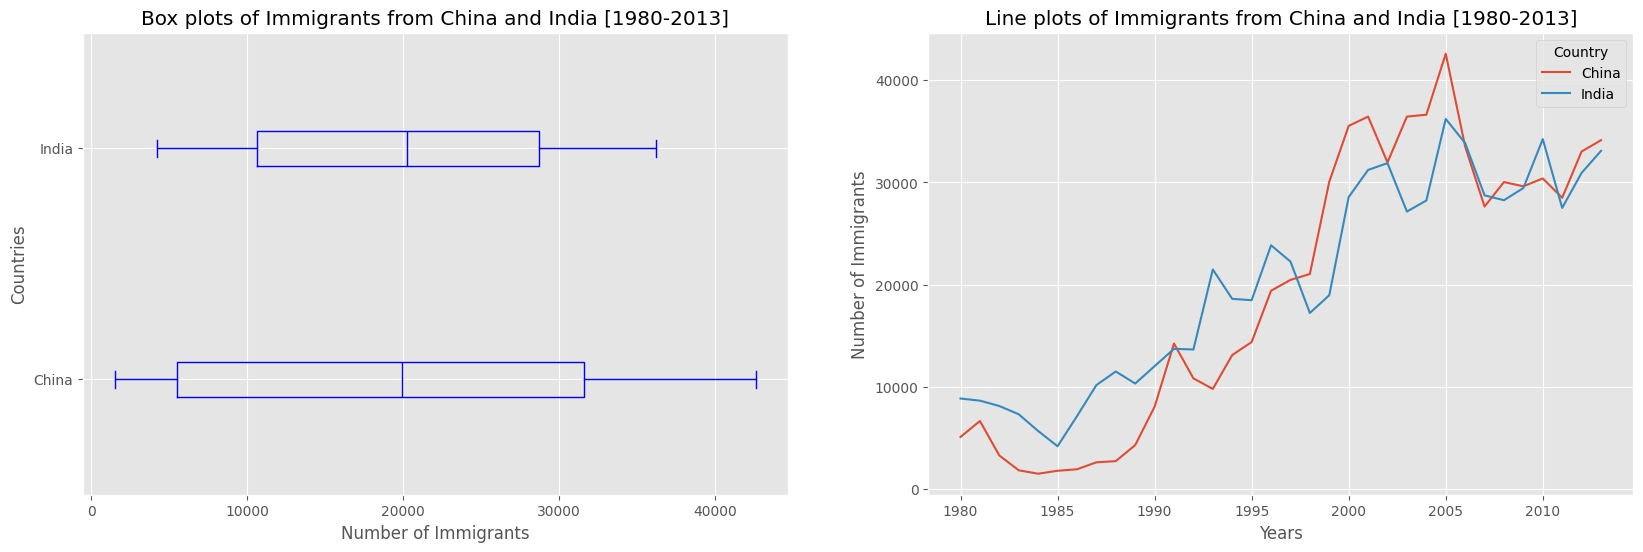

In [21]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
df_cn_in.plot(kind="box", figsize=(20, 6), color="blue", vert=False, ax=ax0)
ax0.set_title("Box plots of Immigrants from China and India [1980-2013]")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")

ax1 = fig.add_subplot(1, 2, 2)
df_cn_in.plot(kind="line", figsize=(20, 6), ax=ax1)
ax1.set_title("Line plots of Immigrants from China and India [1980-2013]")
ax1.set_ylabel("Number of Immigrants")
ax1.set_xlabel("Years")

<p><b>Tip regarding subplot convension</b></p>
<p>In the case when <code>nrows</code>, <code>ncols</code> and <code>plot_number</code> are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent <code>nrows</code>, the tens represent <code>ncols</code> and the units represent <code>plot_number</code>. For instance,</p>
<pre>subplot(211) == subplot(2, 1, 1)</pre>
<p>produces a sub-axes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).</p>

<p>Let's try something a little more advanced.</p>
<p>Previously we identified the top 15 countries based on total immigration from 1980-2013.</p>
<p><b>Question:</b> Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decates <code>1980s</code>, <code>1990s</code> and <code>2000s</code>.</p>

<p><b>Step 1: Get the dataset</b></p>
<p>Get the top 15 countries based on Total immigrant population. Name the dataframe <code>df_top15</code>.</p>

In [22]:
df_top15 = df.sort_values("Total", ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


<p><b>Step 2:</b> Create a new dataframe which contains the aggregate for each decate.</p>
<p>One way to do that:</p>
<ol>
    <li>Create a list of all years in decates <code>1980s</code>, <code>1990s</code> and <code>2000s</code>.</li>
    <li>Slice the original dataframe <code>df</code> to create a Series for each decade and sum across all years for each country.</li>
    <li>Merge the three Series into a new dataframe.</li>
</ol>

In [23]:
def slice_df_from_index(d: pd.DataFrame, in_: list[str]) -> pd.Series:
    return d.loc[:, in_].sum(axis=1)

In [24]:
years_80s = year_list(1980, 1990)
years_90s = year_list(1990, 2000)
years_00s = year_list(2000, 2010)

df_80s = slice_df_from_index(df, years_80s)
df_90s = slice_df_from_index(df, years_90s)
df_00s = slice_df_from_index(df, years_00s)

# 1980s to 2000s => 80t00
df_80t00 = pd.DataFrame({"1980s": df_80s, "1990s": df_90s, "2000s": df_00s})
df_80t00.head()

,1980s,1990s,2000s
Country,,,
Afghanistan,3693,15845,30501
Albania,9,2568,10799
Algeria,1271,13153,37833
American Samoa,3,2,1
Andorra,2,6,5


<p>Let's learn more about the statistics associated with the dataframe using the <code>describe()</code> method.</p>

In [25]:
df_80t00.describe()

,1980s,1990s,2000s
count,195.000000,195.000000,195.000000
mean,5422.938462,10021.492308,12105.538462
std,17099.940917,29129.244091,37447.413889
min,0.000000,0.000000,0.000000
25%,10.000000,196.500000,265.000000
50%,240.000000,1051.000000,1979.000000
75%,3321.500000,6577.500000,8003.000000
max,179171.000000,261966.000000,340385.000000


<p><b>Step 3:</b> Plot the box plots.</p>

Text(0.5, 1.0, 'Immigration from the top 15 countries for decades 1980s, 1990s and 2000s')

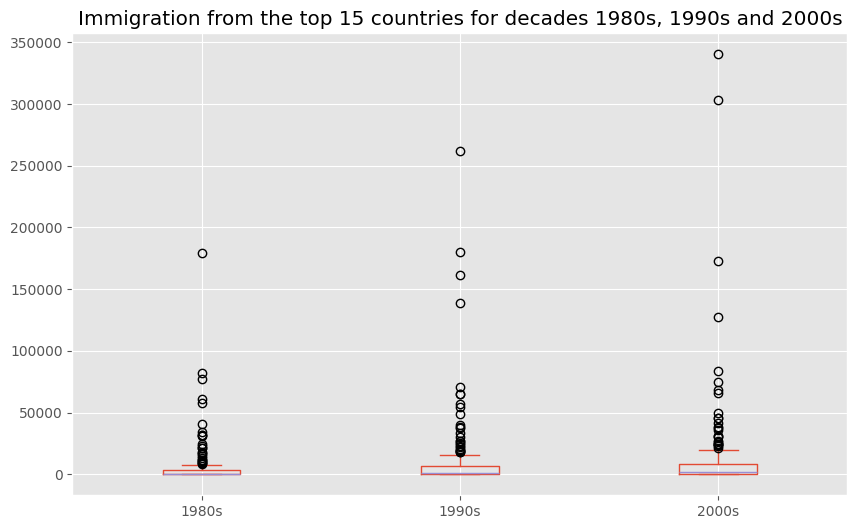

In [26]:
df_80t00.plot(kind="box", figsize=(10, 6))

plt.title("Immigration from the top 15 countries for decades 1980s, 1990s and 2000s")

<p>Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:</p>
<ul>
    <li>Larger than Q3 by at least 1.5 times the interquartile range (IQR), or;</li>
    <li>Smaller than Q1 by at least 1.5 times the IQR.</li>
</ul>
<p>Let's look at decade 2000s as an example:</p>
<ul>
    <li>Q1 (25%) = 36,101.5</li>
    <li>Q3 (75%) = 105,505.5</li>
    <li>IQR = Q3 - Q1 = 69,404</li>
</ul>
<p>Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.</p>

<p>Outlier $>105,505.5+(1.5×69,404)$</p>
<p>Outlier $>209,611.5$</p>

In [27]:
df_80t00 = df_80t00.reset_index()
df_80t00[df_80t00["2000s"] > 209611.5]

,Country,1980s,1990s,2000s
36,China,32003,161528,340385
79,India,82154,180395,303591


<p>China and India are both considered as outliers since their population for the decade exceeds 209,611.5.</p>
<p>The box plot is an advanced visualization tool, and there are many options and customizations that exceed the scope of this lab. Please refer to <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html">matplotlib documentation</a> on box plots for more information.</p>

### Scatter Plots

<p>A <code>scatter</code> plot (2D) is a useful method of comparing variables against each other. <code>Scatter</code> plots look similar to <code>line</code> plots in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.</p>

<p>Let's start by exploring the following:</p>
<p>Using a <code>scatter</code> plot, let's visualize the trend of total immigration to Canada (all countries combined) for the years 1980-2013.</p>

<p><b>Step 1: Get the dataset</b></p>
<p>Since we are expecting to use the relationship between <code>years</code> and <code>total population</code>, we will convert <code>years</code> to <code>int</code> type.</p>

In [28]:
df_total = pd.DataFrame(df[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total = df_total.reset_index()
df_total.columns = ["year", "total"]
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<p><b>Step 2: Plot the data</b></p>
<p>In <code>matplotlib</code>, we can create a <code>scatter</code> plot set by passing in <code>kind="scatter"</code> as plot argument. We will also need to pass in <code>x</code> and <code>y</code> keywords to specify the columns that go on the x-axis and y-axis.</p>

Text(0, 0.5, 'Number of Immigrants')

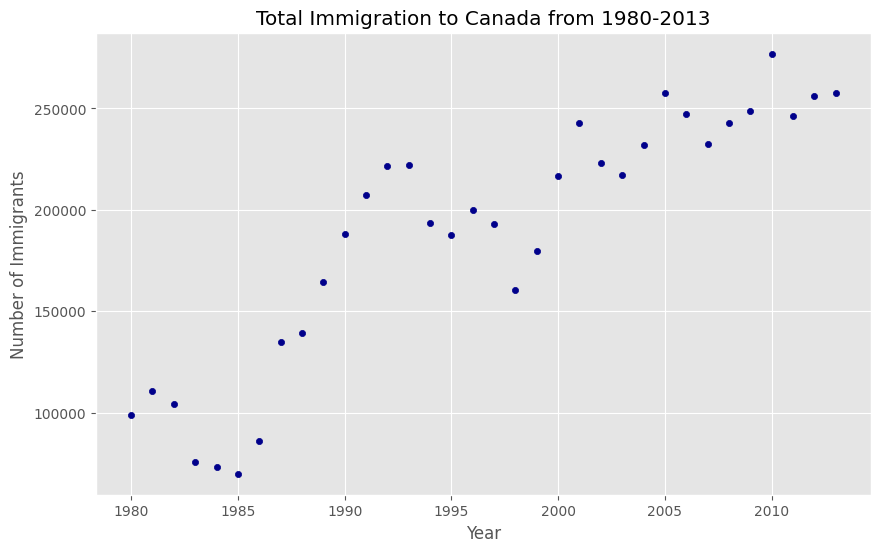

In [29]:
df_total.plot(kind="scatter", x="year", y="total", figsize=(10, 6), color="darkblue")

plt.title("Total Immigration to Canada from 1980-2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

<p>Notice how the scatter plot does not connect the data points together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).</p>

<p>So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.</p>
<p><b>Step 1:</b> Get the equation of line of best fit. We will use <code>numpy</code>'s <code>polyfit(x, y, deg)</code> method by passing in the following parameters:</p>
<ul>
    <li><code>x</code>: x-coordinates of the data.</li>
    <li><code>y</code>: y-coordinates of the data.</li>
    <li><code>deg</code>: Degree of fitting polynomial, 1 = linear, 2 = quadratic, and so on.</li>
</ul>

In [30]:
x = df_total["year"]
y = df_total["total"]

In [31]:
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

<p>The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a Linear Regression $y=ax+b$, our output has 2 elements <code>[5.56709228e+03, -1.09261952e+07]</code> with the slope in position 0 and intercept in position 1.</p>

<p><b>Step 2:</code> Plot the regression line on the <code>scatter</code> plot.</p>

'No. Immigrants = 5567 × year + -10926195'

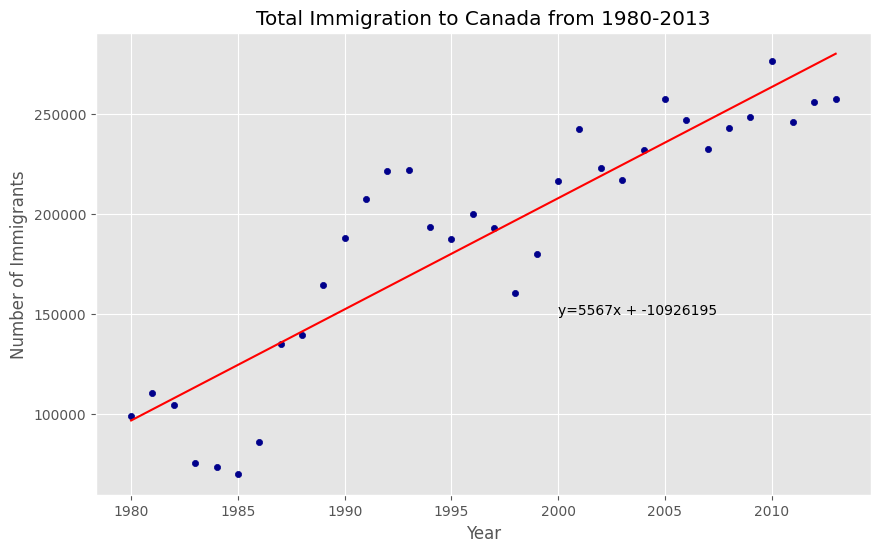

In [32]:
df_total.plot(kind="scatter", x="year", y="total", figsize=(10, 6), color="darkblue")

plt.title("Total Immigration to Canada from 1980-2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.plot(x, fit[0] * x + fit[1], color="red")
plt.annotate(f"y={fit[0]:.0f}x + {fit[1]:.0f}", xy=(2000, 150000))

f"No. Immigrants = {fit[0]:.0f} × year + {fit[1]:.0f}"

<p>Using the equation of line of best fit, we can estimate the number of immigrants in 2015:</p>
<pre>No. Immigrants = 5,567 × Year - 10,926,195<br />No. Immigrants = 5,567 × 2,015 - 10,926,195<br />No. Immigrants = 291,310</pre>

<p><b>Question:</b> Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?</p>

<p><b>Step 1: Get the data</b></p>
<ol>
    <li>Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only.</li>
    <li>Sum the immigration numbers across all three countries for each year and turn the result into a dataframe.</li>
    <li>Reset the index in place.</li>
    <li>Rename the columns to <code>year</code> and <code>total</code>.</li>
    <li>Display the resulting dataframe.</li>
</ol>

In [33]:
df_dk_no_se = df.loc[["Denmark", "Norway", "Sweden"], years].transpose()

df_total = pd.DataFrame(df_dk_no_se.sum(axis=1))
df_total = df_total.reset_index()
df_total.columns = ["year", "total"]
df_total["year"] = df_total["year"].astype(int)

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


<p><b>Step 2:</b> Generate the scatter plot by plotting the total versus year in <code>df_total</code>.</p>

Text(0, 0.5, 'Number of Immigrants')

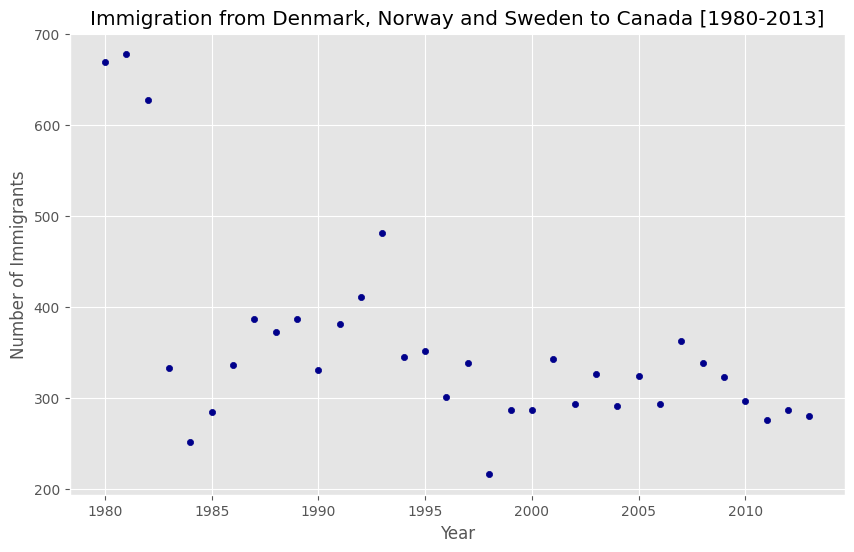

In [34]:
df_total.plot(kind="scatter", x="year", y="total", figsize=(10, 6), color="darkblue")

plt.title("Immigration from Denmark, Norway and Sweden to Canada [1980-2013]")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

### Bubble Plots

<p>A <code>bubble</code> plot is a variation of the <code>scatter</code> plot that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable <code>z</code>, also known as the weight. In <code>maplotlib</code>, we can pass in an array or scalar to the parameter <code>s</code> to <code>plot()</code>, that contains the weight of each point.</p>

<p><b>Let's start by analyzing the effect of Argentina's great depression.</b></p>
<p>Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign dept. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.</p>
<p>Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a <code>bubble</code> plot of immigration from Brazil and Argentina for the years 1980-2013. We will set the weights for the bubble as the <b>normalized</b> value of the population for each other.</p>

<p><b>Step 1:</b> Get the data for Brazil and Argentina. Like in the previous example, we will convert the <code>years</code> to type int and include it in the dataframe.</p>

In [35]:
df_t = df[years].transpose()

df_t.index = map(int, df_t.index)
df_t.index.name = "year"
df_t = df_t.reset_index()

df_t.head()

Country,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


<p><b>Step 2:</b> Create the normalized weights.</p>
<p>There are several methods of normalizations in statistics, each with its own use. In this case, we will use <a href="https://en.wikipedia.org/wiki/Feature_scaling">feature scaling</a> to bring all values into the range [0, 1]. The general formula is:</p>

$$
X'=\frac{X-X_{min}}{X_{max}-X_{min}}
$$

<p>Where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scalesd to a value between 0-1 accordingly.</p>

In [36]:
def norm(df_: pd.Series) -> pd.Series:
    return (df_ - df_.min()) / (df_.max() - df_.min())

In [37]:
norm_bra = norm(df_t["Brazil"])
norm_ar = norm(df_t["Argentina"])

<p><b>Step 3:</b> Plot the data.</p>
<ul>
    <li>To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the <code>ax</code> parameter.</li>
    <li>
    We will also pass in the weights using the <code>s</code> parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    <ul>
        <li>Multiply weights by 2000 to scale it up on the graph, and;</li>
        <li>Add 10 to compensate for the min value (which has a 0 weight and therefore scale with $×2000$).</li>
    </ul>
    </li>
</ul>

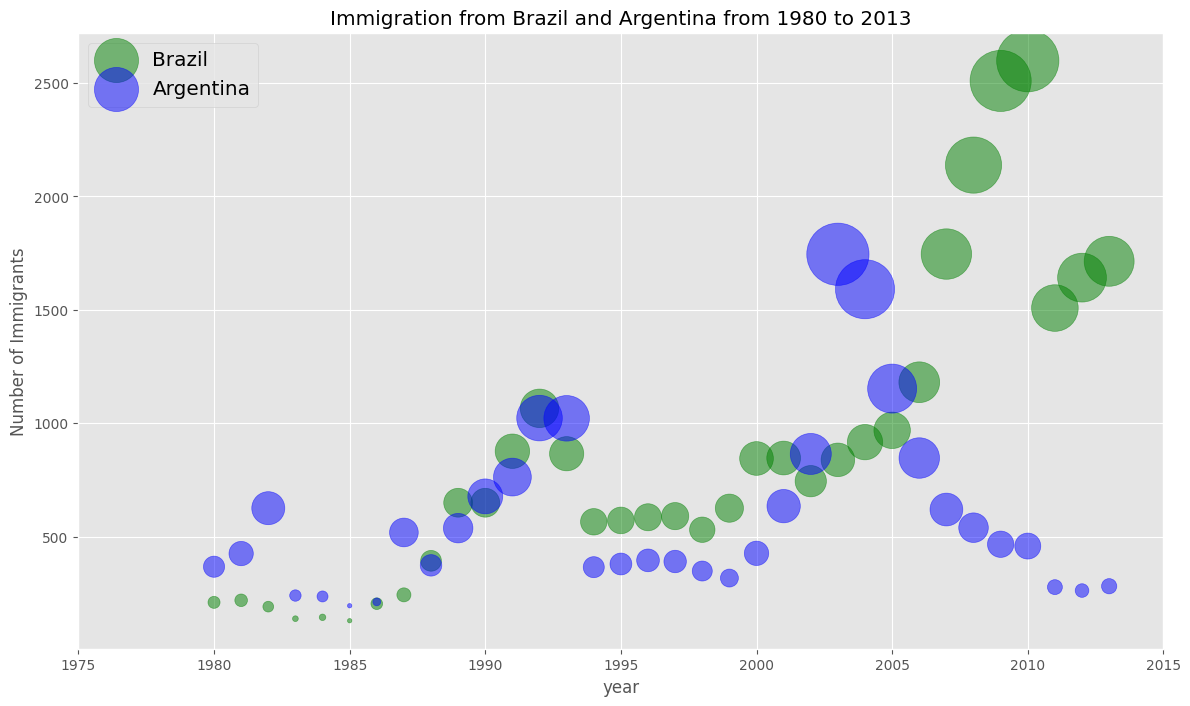

In [38]:
ax0 = df_t.plot(kind="scatter", x="year", y="Brazil", figsize=(14, 8), alpha=0.5, color="green", s=norm_bra * 2000 + 10, xlim=(1975, 2015))

df_t.plot(kind="scatter", x="year", y="Argentina", alpha=0.5, color="blue", s=norm_ar * 2000 + 10, ax=ax0)

ax0.set_title("Immigration from Brazil and Argentina from 1980 to 2013")
ax0.set_ylabel("Number of Immigrants")
ax0.legend(["Brazil", "Argentina"], loc="upper left", fontsize="x-large")

<p>The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.</p>
<p>From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.</p>
<p>On a similar note, Brazil suffered the <b>Samba Effect</b> where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.</p>

<p><b>Question:</b> Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use <code>df_t</code> that we defined and used in the previous example.</p>

<p><b>Step 1:</b> Normalize the data pertaining to China and India.</p>

In [39]:
norm_cn = norm(df_t["China"])
norm_in = norm(df_t["India"])

<p><b>Step 2: Generate the bubble plots.<b></p>

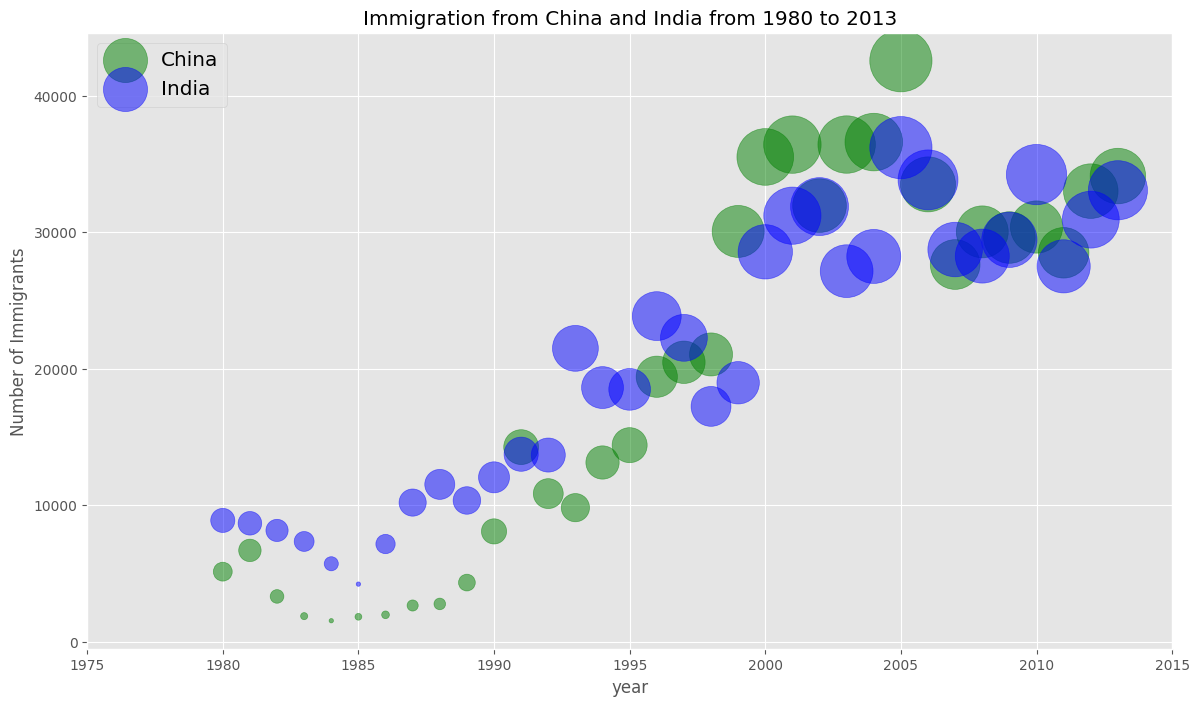

In [40]:
ax0 = df_t.plot(kind="scatter", x="year", y="China", figsize=(14, 8), alpha=0.5, color="green", s=norm_cn * 2000 + 10, xlim=(1975, 2015))

df_t.plot(kind="scatter", x="year", y="India", alpha=0.5, color="blue", s=norm_in * 2000 + 10, ax=ax0)

ax0.set_title("Immigration from China and India from 1980 to 2013")
ax0.set_ylabel("Number of Immigrants")
ax0.legend(["China", "India"], loc="upper left", fontsize="x-large")

****
This is the end of the file.
****